

<img src="http://cdn2.hubspot.net/hubfs/650754/Stock_Images_(no_text)/parkinsons.jpg" style="width:700px">


In this notebook we will study a Parkinson's Disease data set.

In [1]:
print(open('UCIMLR/Parkinsons/parkinsons.txt', 'r').read())

Title: Parkinsons Disease Data Set

Abstract: Oxford Parkinson's Disease Detection Dataset

-----------------------------------------------------	

Data Set Characteristics: Multivariate
Number of Instances: 197
Area: Life
Attribute Characteristics: Real
Number of Attributes: 23
Date Donated: 2008-06-26
Associated Tasks: Classification
Missing Values? N/A

-----------------------------------------------------	

Source:

The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.

-----------------------------------------------------

Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
rec

## Loading in the libraries


In [19]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pylab as py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns
import math

%matplotlib inline

## Introduction

## Reading the data

The first thing that you do with data is to take a a look at this, so let's begin our analysis by reading in the data.   This was not as trivial as we have originally thought since we kept running into errors.  The problem was that:

<b> we needed to make sure the data was in the correct directory</b>

The eaisiest thing to do is have the data in the same directory at the Jupyter notebook.

In [143]:
data = pd.read_csv('UCIMLR/Parkinsons/parkinsons.csv')

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null float64
PPE                 195 non-null f

In [145]:
data.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1   spread2  \
0      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482   
1      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590   
2      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173   
3      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147   
4      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513   

         D2       PPE  status  
0  2.301442  0.284654       1  
1  2.486855  0.368674       1  
2  2.342259  0.332634       1  
3  2.405554  0.368975       1  
4  2.332180  0.410335       1  

[5 rows x 23 columns]

The size of our data is:

In [64]:
data.shape

(195, 23)

Which means we have 195 total measurements and each measurement has 23 values.  For example our first measurement is 

In [65]:
data.iloc[0,:]

MDVP:Fo(Hz)         119.992000
MDVP:Fhi(Hz)        157.302000
MDVP:Flo(Hz)         74.997000
MDVP:Jitter(%)        0.007840
MDVP:Jitter(Abs)      0.000070
MDVP:RAP              0.003700
MDVP:PPQ              0.005540
Jitter:DDP            0.011090
MDVP:Shimmer          0.043740
MDVP:Shimmer(dB)      0.426000
Shimmer:APQ3          0.021820
Shimmer:APQ5          0.031300
MDVP:APQ              0.029710
Shimmer:DDA           0.065450
NHR                   0.022110
HNR                  21.033000
RPDE                  0.414783
DFA                   0.815285
spread1              -4.813031
spread2               0.266482
D2                    2.301442
PPE                   0.284654
status                1.000000
Name: 0, dtype: float64

Observe that we want to predict if a person has Parkinson's or not based on markers of voice recordings. 

## Looking at the data

In [146]:
data.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1   spread2  \
0      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482   
1      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590   
2      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173   
3      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147   
4      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513   

         D2       PPE  status  
0  2.301442  0.284654       1  
1  2.486855  0.368674       1  
2  2.342259  0.332634       1  
3  2.405554  0.368975       1  
4  2.332180  0.410335       1  

[5 rows x 23 columns]

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null float64
PPE                 195 non-null f

In [147]:
colors_palette = {0: 'red', 1: 'blue'}
colors = [colors_palette[c] for c in data.status]

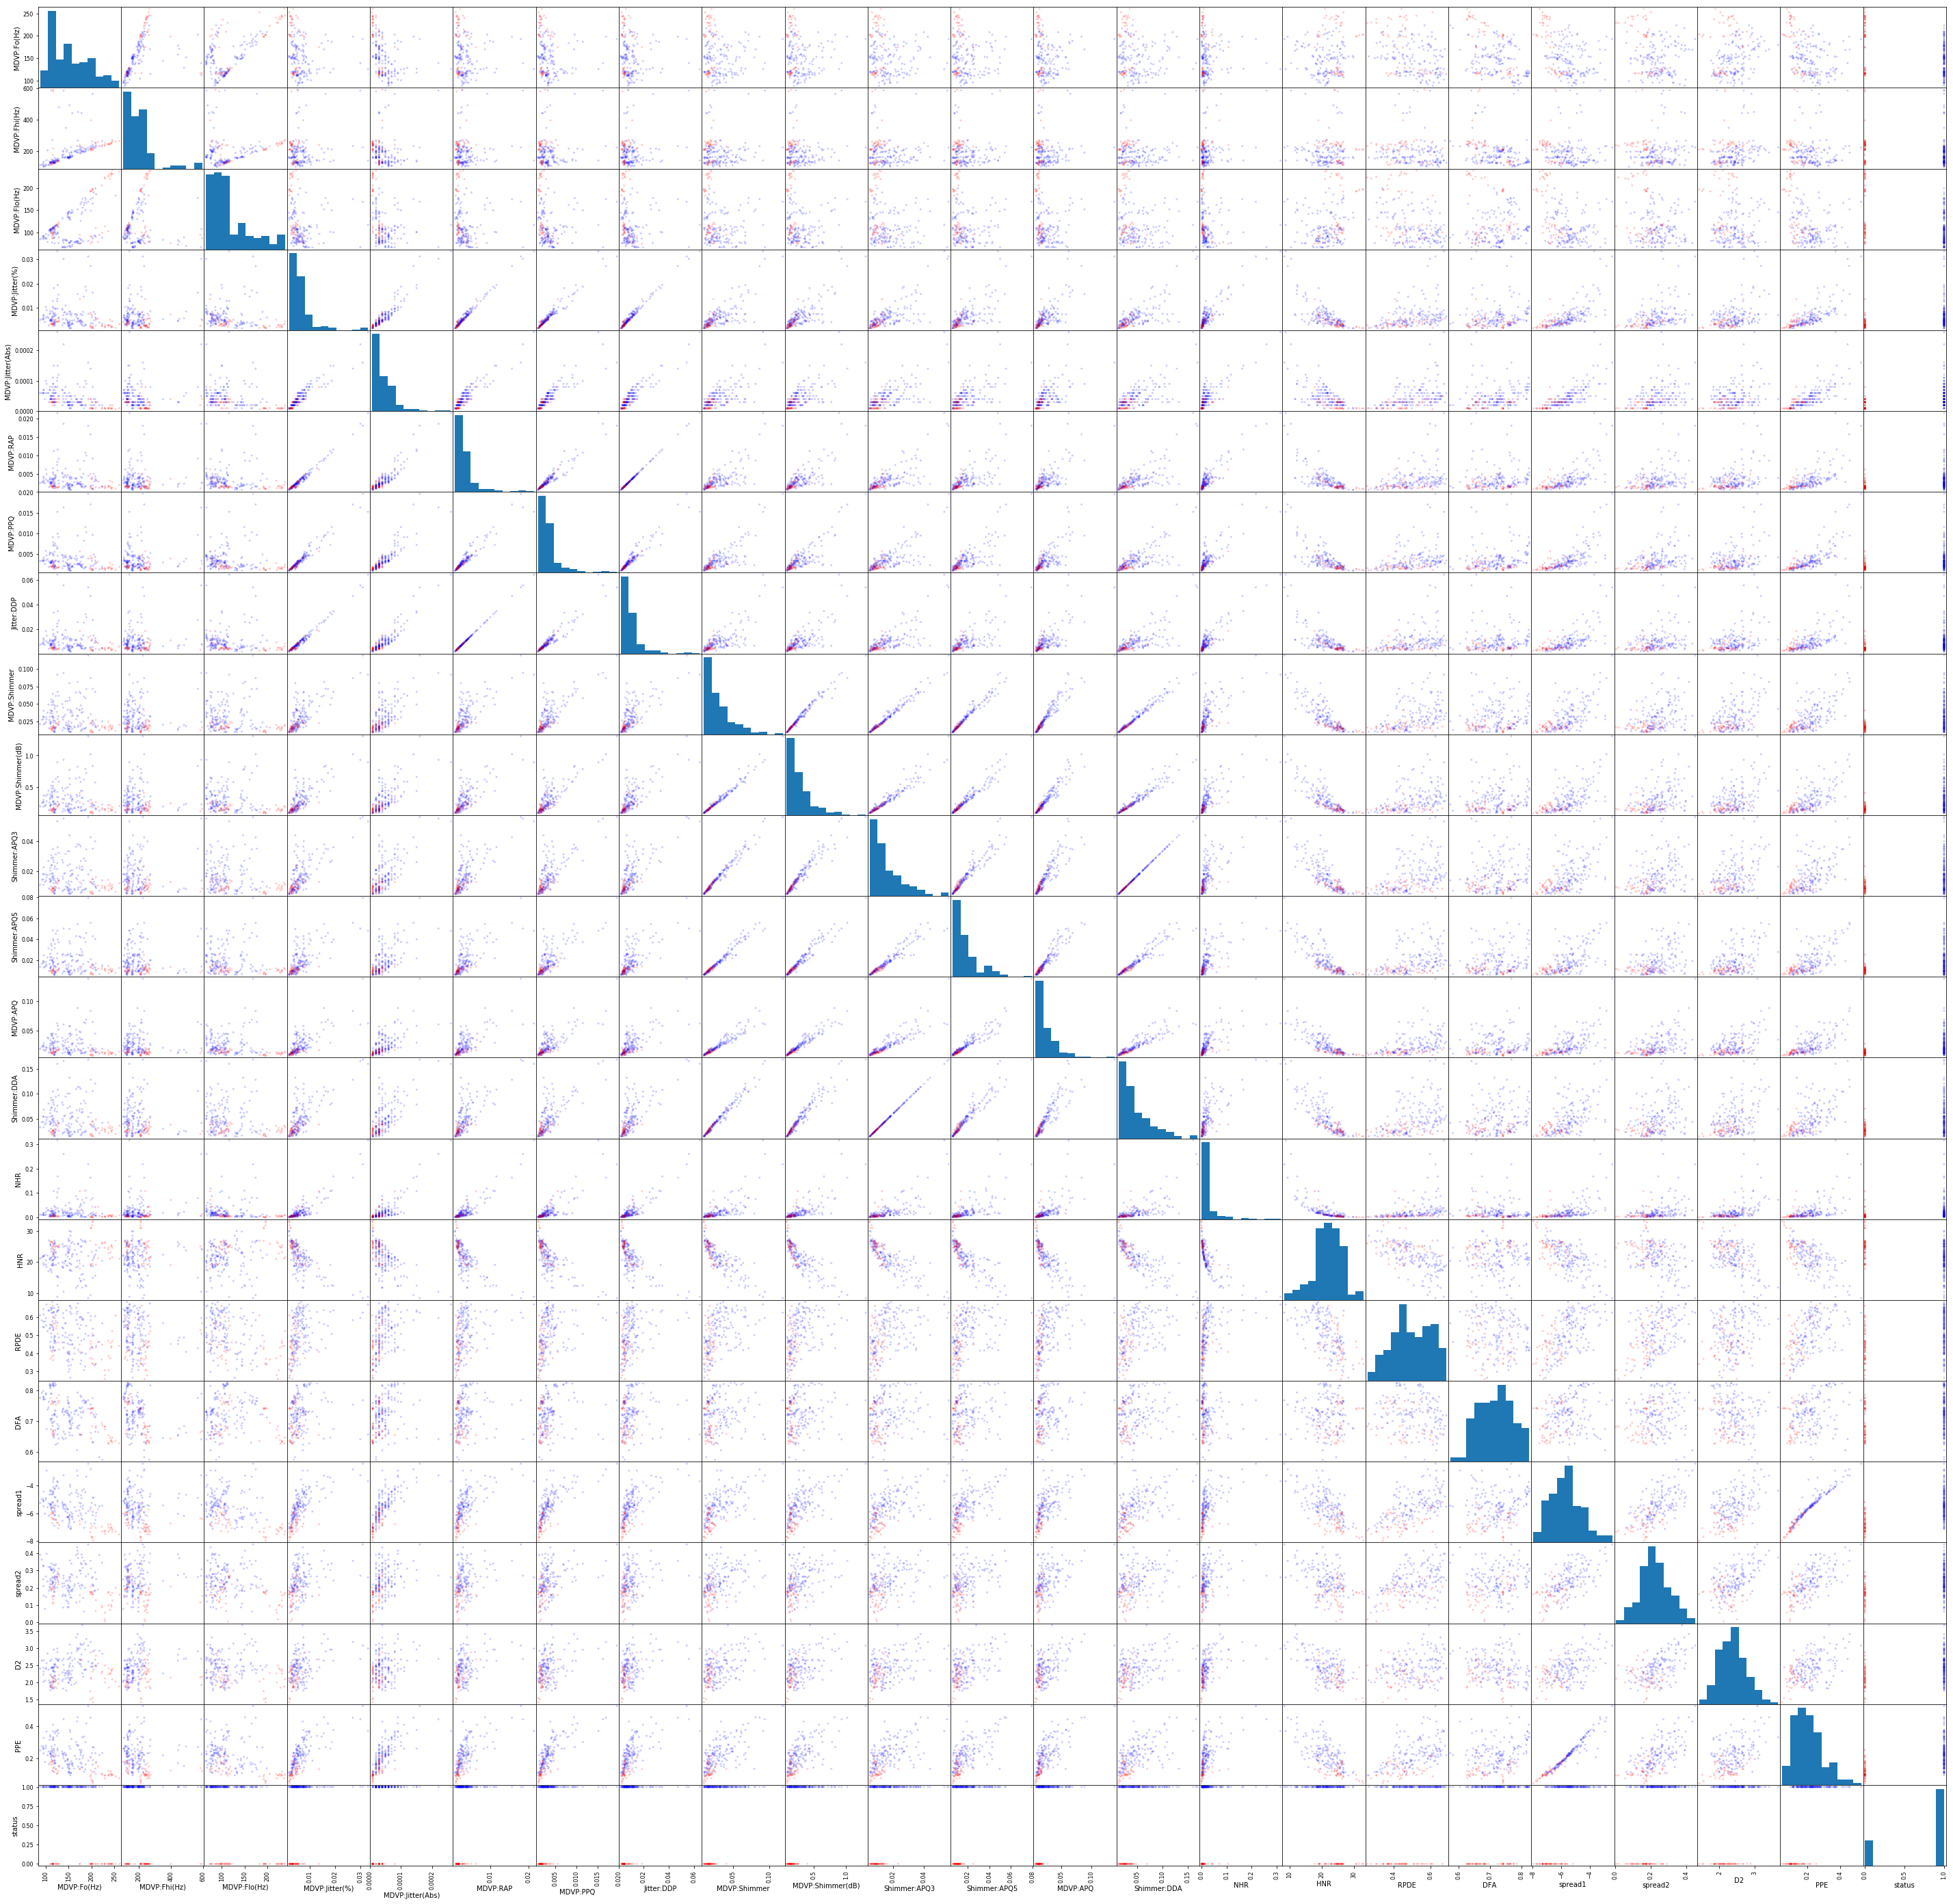

In [148]:
pa.plotting.scatter_matrix(data, alpha=0.2, figsize=(50,50), c= colors);

In [67]:
data['Jitt_log'] = np.log(data['Jitter:DDP'])
data.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

       NHR     HNR      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  status  Jitt_log  
0  0.284654       1 -4.501711  
1  0.368674       1 -4.272993  
2  0.332634       1 -4.114751  
3  0.368975       1 -4.196377  
4  0.410335       1 -3.929169  

[5 rows x 24 columns]

In [68]:
data['NHR_log'] = np.log(data['NHR'])
data.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

      HNR      RPDE       DFA   spread1   spread2        D2       PPE  status  \
0  21.033  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654       1   
1  19.085  0.458359  0.819521 -4.075192  0.335590  2.486855  0.368674       1   
2  20.651  0.429895  0.825288 -4.443179  0.311173  2.342259  0.332634       1   
3  20.644  0.434969  0.819235 -4.117501  0.334147  2.405554  0.368975       1   
4  19.649  0.417356  0.823484 -3.747787  0.234513  2.332180  0.410335       1   

   Jitt_log   NHR_log  
0 -4.501711 -3.811725  
1 -4.272993 -3.948168  
2 -4.114751 -4.335907  
3 -4.196377 -4.302846  
4 -3.929169 -4.035887  

[5 rows x 25 columns]

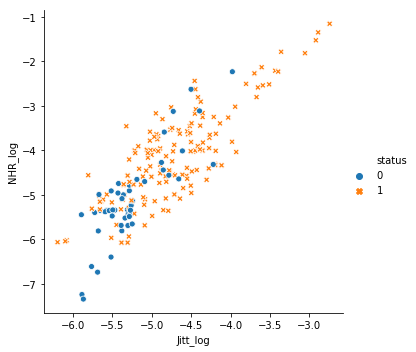

In [69]:
sns.relplot(x= 'Jitt_log' , y= 'NHR_log', hue='status', style='status', data=data);

In [90]:
data.iloc[:, -3]

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
165    0
166    0
167    0
168    0
169    0
170    0
171    0
172    0
173    0
174    0
175    0
176    0
177    1
178    1
179    1
180    1
181    1
182    1
183    0
184    0
185    0
186    0
187    0
188    0
189    0
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [87]:
X= np.array(data.iloc[:, 23:])
X

array([[-4.50171148, -3.81172528],
       [-4.27299287, -3.94816845],
       [-4.11475137, -4.3359067 ],
       [-4.19637729, -4.30284584],
       [-3.92916916, -4.03588699],
       [-4.27730632, -4.40468133],
       [-5.36873983, -5.10439667],
       [-5.44681737, -5.67228381],
       [-4.73300356, -4.53751154],
       [-4.82457075, -4.58340869],
       [-4.87566743, -4.4515911 ],
       [-4.77477297, -4.47326512],
       [-5.64080768, -5.14817471],
       [-5.30634954, -4.5649884 ],
       [-5.6157716 , -5.1011072 ],
       [-5.35806737, -4.78071476],
       [-5.06403607, -3.98513148],
       [-4.76416592, -3.53392909],
       [-4.51715931, -3.45459816],
       [-4.49541932, -3.39174222],
       [-4.35441147, -3.25165731],
       [-4.9675758 , -3.99052523],
       [-5.01917163, -4.35831011],
       [-5.01615047, -3.99540461],
       [-4.47414192, -4.02968105],
       [-4.65857096, -3.54495229],
       [-4.89285226, -4.51441582],
       [-4.89418648, -4.32149613],
       [-5.34750761,

In [91]:
y= np.array(data.iloc[:, -3])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

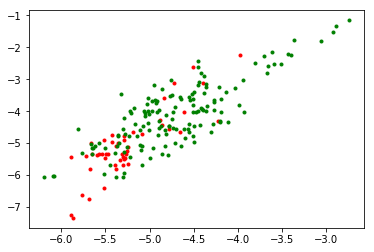

In [93]:
py.plot(X[y==0,0],X[y==0,1],'r.')
py.plot(X[y!=0,0],X[y!=0,1],'g.')

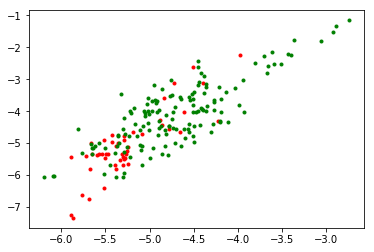

In [98]:
py.plot(X[y==0,0],X[y==0,1],'r.')
py.plot(X[y==1,0],X[y==1,1],'g.')

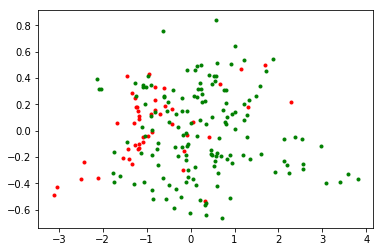

In [102]:
from sklearn.decomposition import PCA

XPCA = PCA(n_components=2).fit_transform(X)
py.plot(XPCA[y==0,0],XPCA[y==0,1],'r.')
py.plot(XPCA[y==1,0],XPCA[y==1,1],'g.')

In [100]:
# Import the K-NN solver
from sklearn import neighbors

In [104]:
# This is the one complicated bit of code in the whole demo.  There is no need to modify it, but please feel free if you want!
def runTest(clf,X,y,trainingPercent=0.66):
    # A little cheat to make the pictures consistent
    np.random.seed(123)
    
    # If there is one thing that I want to harp on, it is the difference
    # between testing and training errors!  So, here we create a training
    # set on which we computer the parameters of our algorithm, and a 
    # testing set for seeing how well we generalize (and work on real 
    # world problems).
    perm = np.random.permutation(len(y))
    n = X.shape[0]
    trainSize = int(trainingPercent*n)
    Xtrain = X[perm[:trainSize],0:2]
    Xtest = X[perm[trainSize:],0:2]

    yHat = y
    yHattrain = yHat[perm[:trainSize]]
    yHattest = yHat[perm[trainSize:]]

    # Run the calculation!
    clf.fit(Xtrain, yHattrain)
    
    # step size in the mesh for plotting the decision boundary.
    h = .02  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    py.figure(1, figsize=(8, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    py.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    py.scatter(Xtrain[:, 0], Xtrain[:, 1], c=yHattrain, cmap=cmap_bold,marker='o')
    py.scatter(Xtest[:, 0], Xtest[:, 1], c=yHattest, cmap=cmap_bold,marker='+')
    py.xlim(xx.min(), xx.max())
    py.ylim(yy.min(), yy.max())
    py.show()

    # Print out some metrics
    print('training score',clf.score(Xtrain,yHattrain))
    print('testing score',clf.score(Xtest,yHattest))

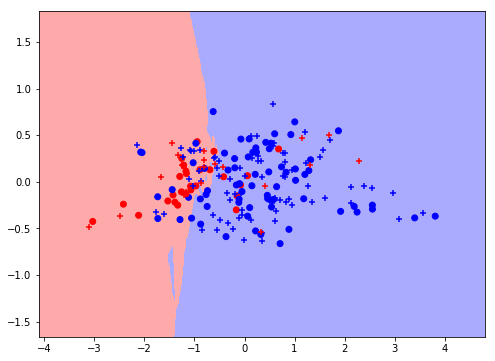

training score 0.8144329896907216
testing score 0.7653061224489796


In [130]:
clf = neighbors.KNeighborsClassifier(n_neighbors=10)
#yEasy = y.copy()
#yEasy[y==1] = 1
runTest(clf,XPCA[:,[0,1]],y, trainingPercent = 0.5)

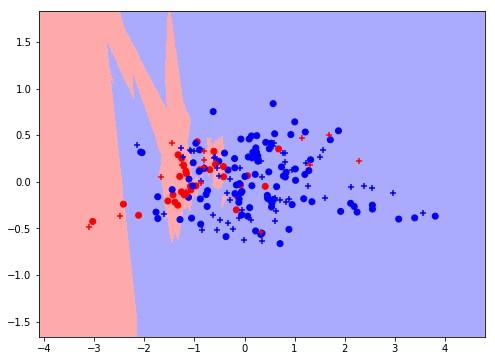

training score 0.8671875
testing score 0.7761194029850746


In [131]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,XPCA[:,[0,1]],y)

/Users/adrianamorales/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/adrianamorales/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


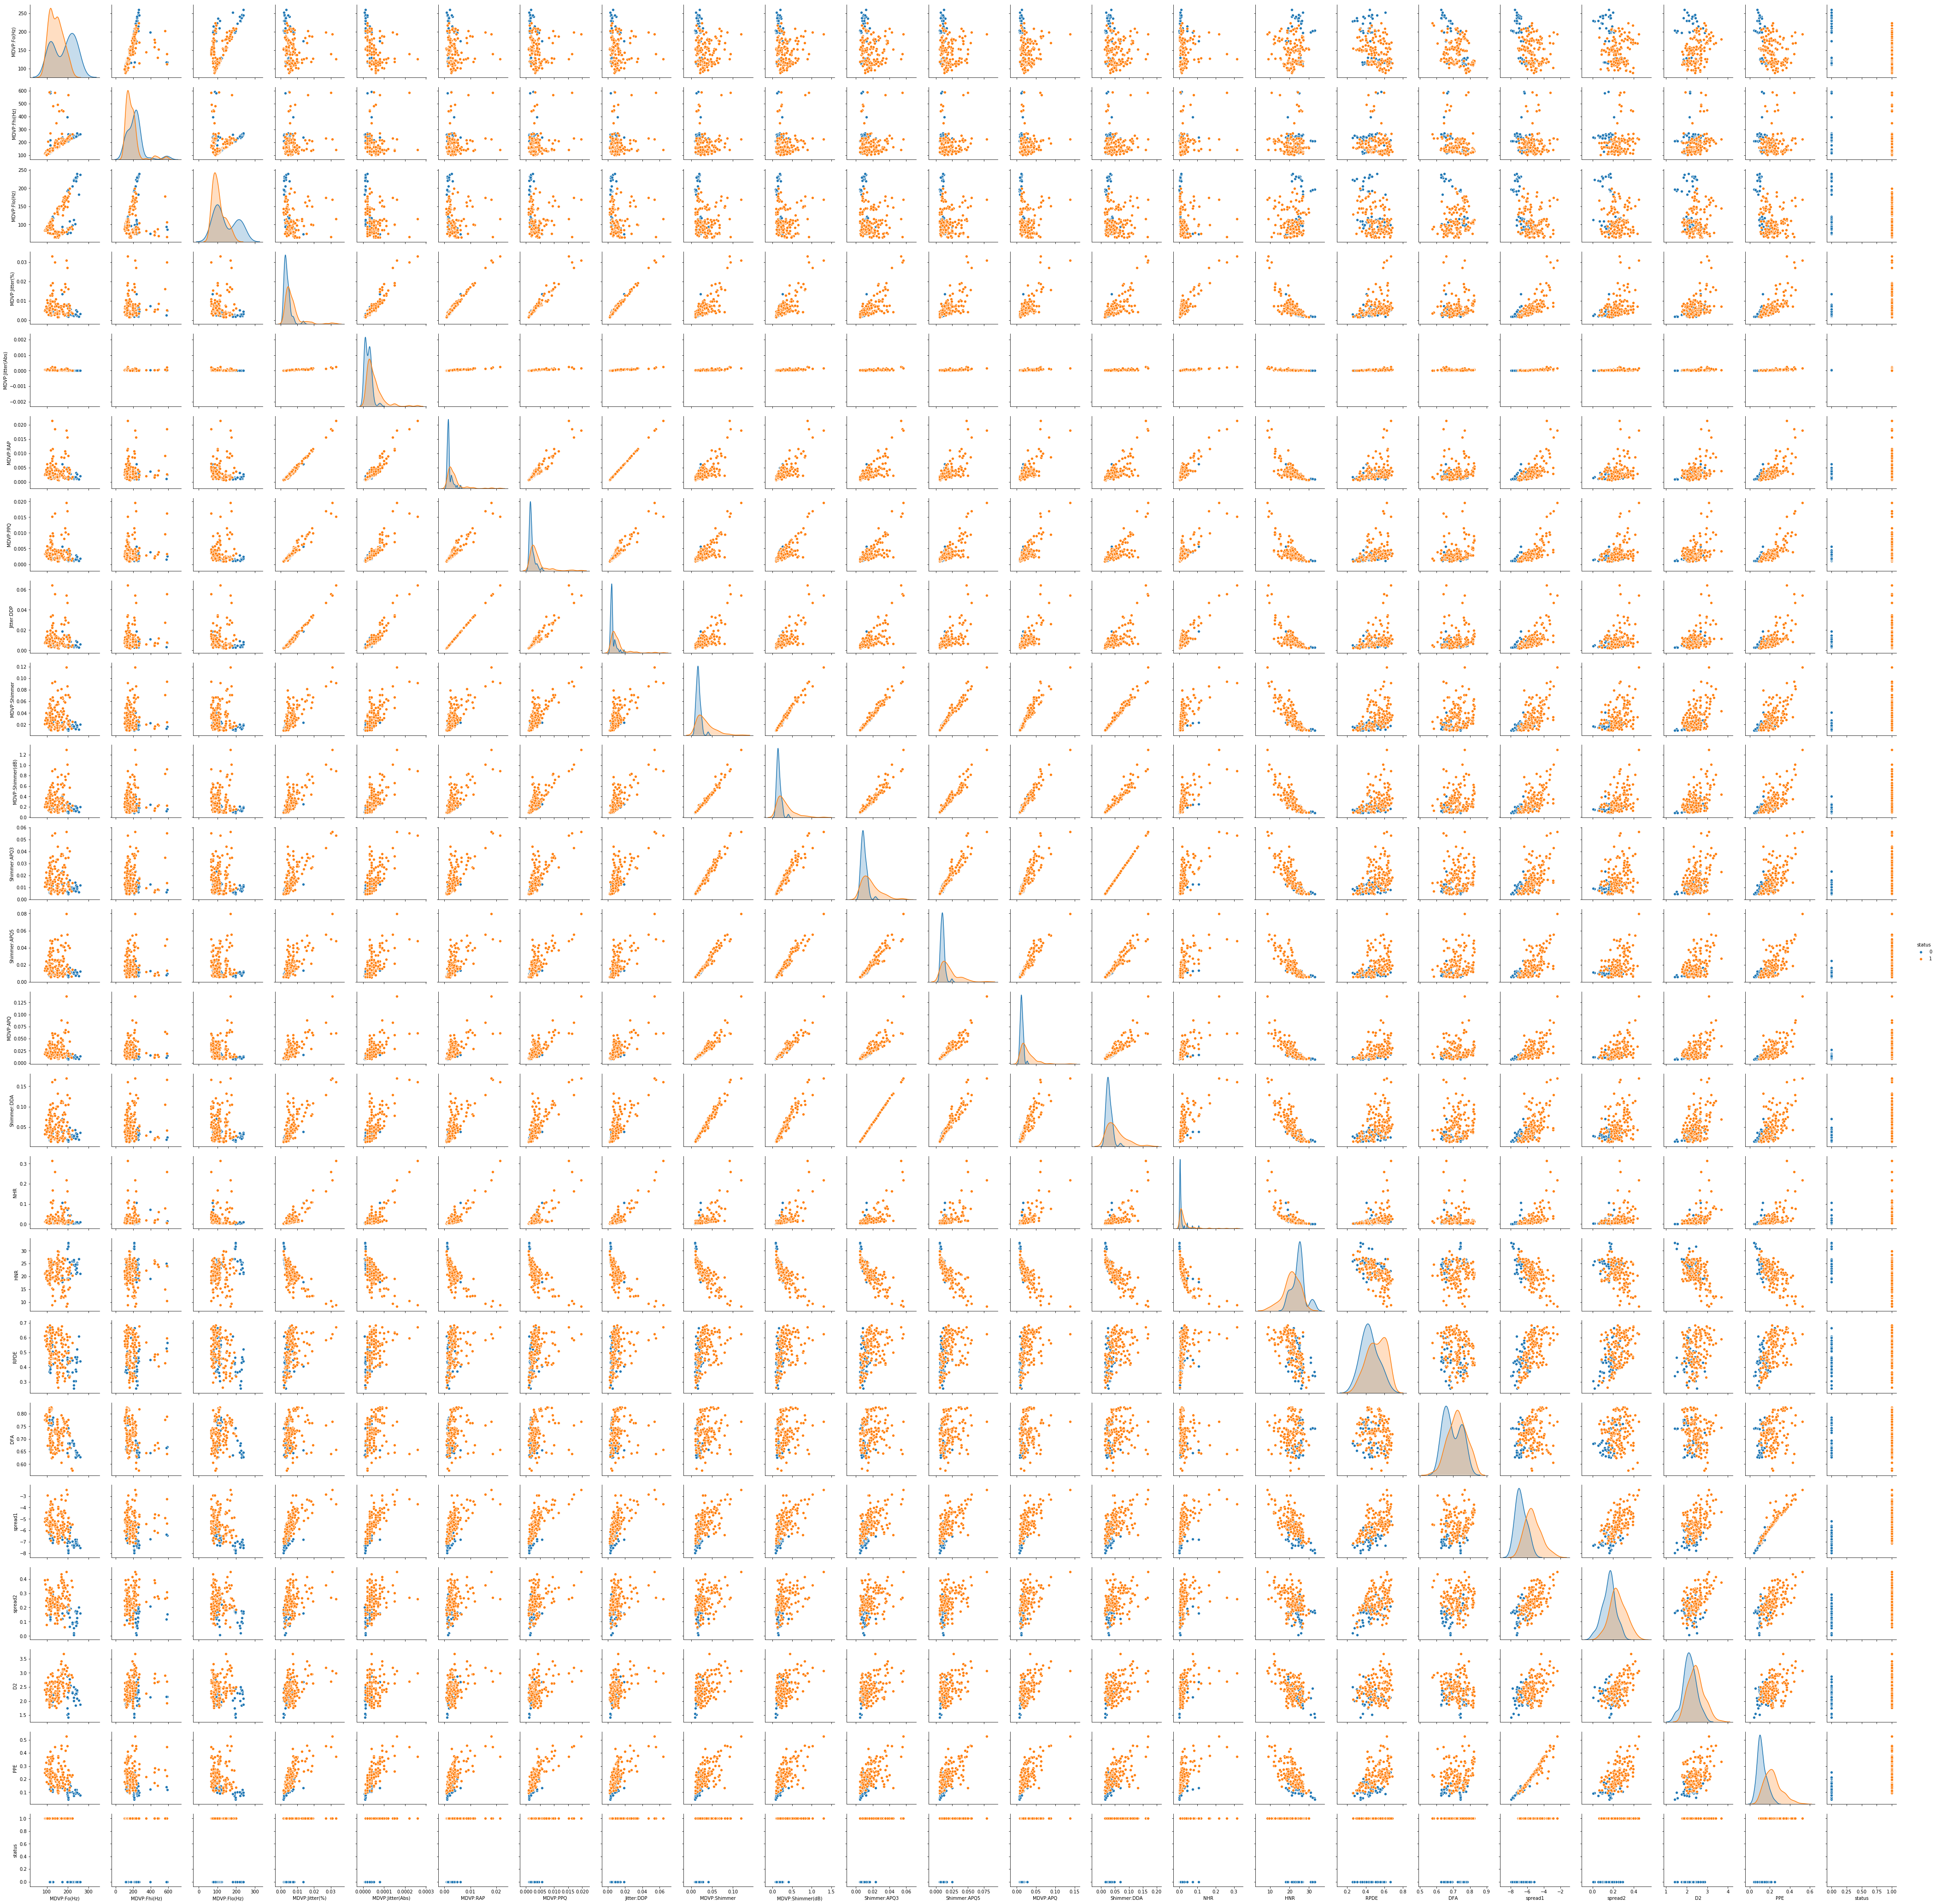

In [183]:
sns.pairplot(data, hue="status")

In [137]:
mean_vec = []
for i in data["status"].unique():
    mean_vec.append( np.array((data[data["status"]==i].mean()[:25]) ))
print(mean_vec)

[array([ 1.45180762e+02,  1.88441463e+02,  1.06893558e+02,  6.98925170e-03,
        5.06802721e-05,  3.75748299e-03,  3.90034014e-03,  1.12730612e-02,
        3.36581633e-02,  3.21204082e-01,  1.76757823e-02,  2.02846939e-02,
        2.76004082e-02,  5.30272789e-02,  2.92109524e-02,  2.09740476e+01,
        5.16815918e-01,  7.25407939e-01, -5.33341972e+00,  2.48132667e-01,
        2.45605804e+00,  2.33828224e-01,  1.00000000e+00, -4.71150330e+00,
       -4.11795808e+00]), array([ 1.81937771e+02,  2.23636750e+02,  1.45207292e+02,  3.86604167e-03,
        2.33750000e-05,  1.92500000e-03,  2.05604167e-03,  5.77604167e-03,
        1.76152083e-02,  1.62958333e-01,  9.50354167e-03,  1.05085417e-02,
        1.33047917e-02,  2.85114583e-02,  1.14827083e-02,  2.46787500e+01,
        4.42551875e-01,  6.95715562e-01, -6.75926387e+00,  1.60292000e-01,
        2.15449073e+00,  1.23017104e-01,  0.00000000e+00, -5.26044791e+00,
       -5.08209727e+00])]


In [149]:
X = data.iloc[:, :-1] # Features
y = data.status # Target variable

In [153]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [155]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [156]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.847457627118644


In [166]:
conda install graphviz

Solving environment: done

## Package Plan ##

  environment location: /Users/adrianamorales/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         1.2 MB
    conda-4.6.14               |           py37_0         2.1 MB
    fontconfig-2.13.0          |       h5d5b041_1         245 KB
    fribidi-1.0.5              |       h1de35cc_0          62 KB
    graphite2-1.3.13           |       h2098e52_0          83 KB
    graphviz-2.40.1            |       hefbbd9a_2         6.7 MB
    harfbuzz-1.8.8             |       hb8d4a28_0         703 KB
    pango-1.42.4               |       h060686c_0         523 KB
    pixman-0.38.0              |       h1de35cc_0         611 KB
    ------------------------------------------------------------
                                           Total:        12.

In [168]:
conda install pydotplus

Solving environment: done

## Package Plan ##

  environment location: /Users/adrianamorales/anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |           py37_1          42 KB
    ------------------------------------------------------------
                                           Total:          42 KB

The following NEW packages will be INSTALLED:

  pydotplus          pkgs/main/osx-64::pydotplus-2.0.2-py37_1



pydotplus-2.0.2      | 42 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [175]:
feature_cols= ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)','Shimmer:APQ3',
'Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2', 'PPE']

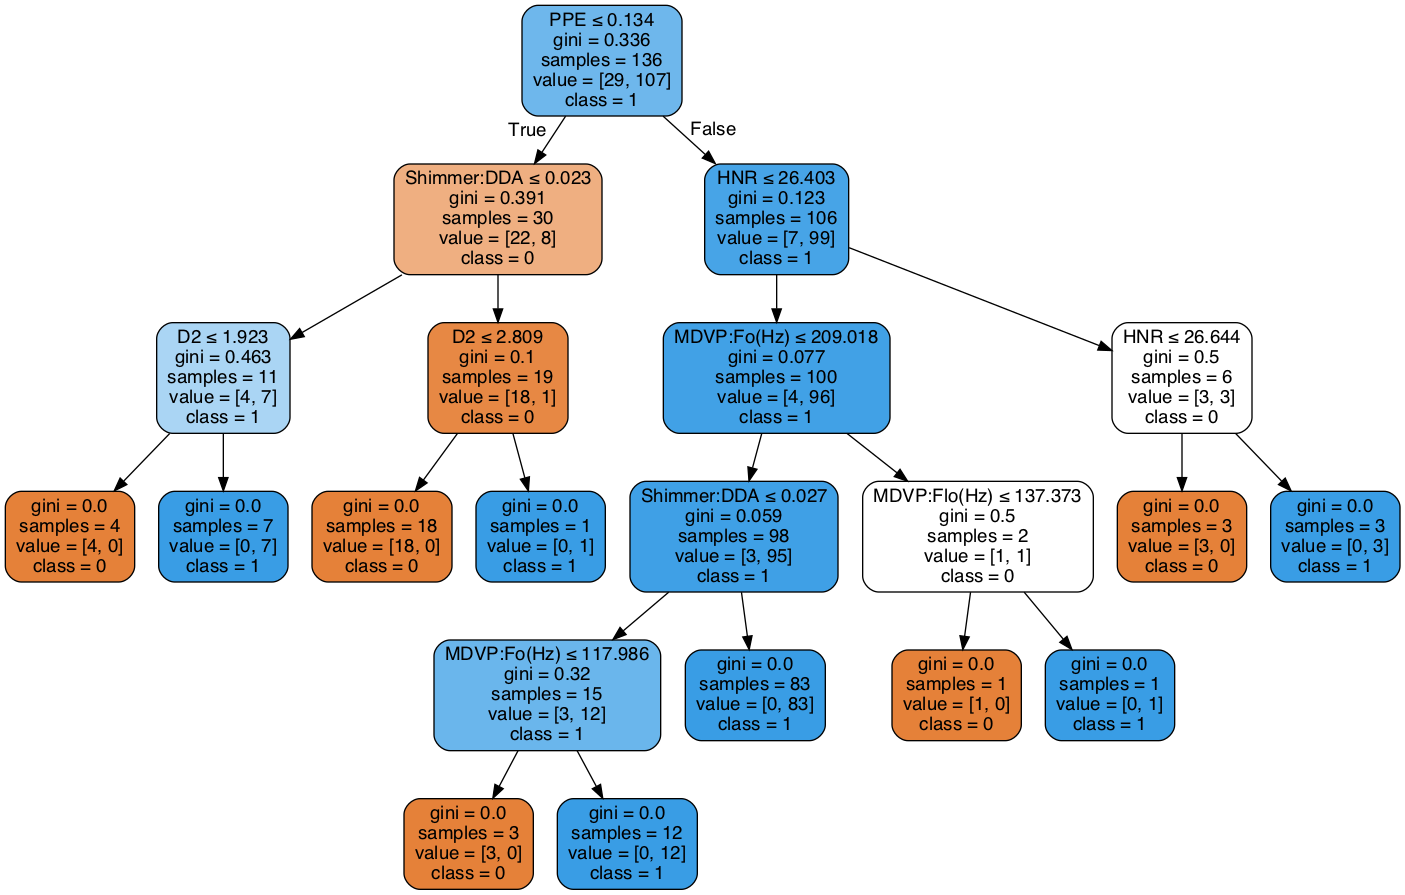

In [178]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols  ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('parkinsons.png')
Image(graph.create_png())

In [179]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8983050847457628


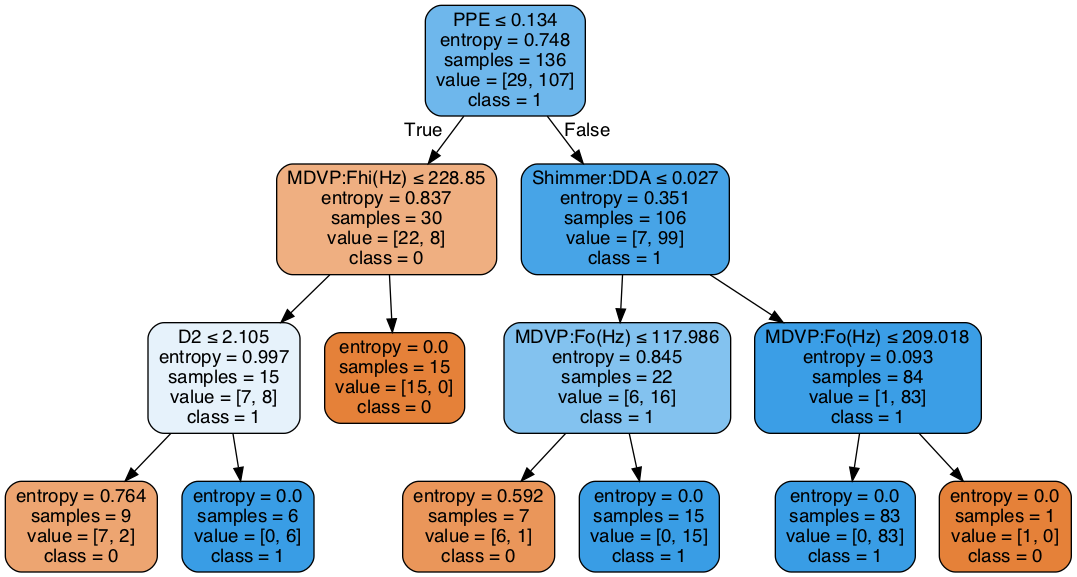

In [180]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('parkinsons.png')
Image(graph.create_png())

In [182]:
data.iloc[4,:]

MDVP:Fo(Hz)         116.014000
MDVP:Fhi(Hz)        141.781000
MDVP:Flo(Hz)        110.655000
MDVP:Jitter(%)        0.012840
MDVP:Jitter(Abs)      0.000110
MDVP:RAP              0.006550
MDVP:PPQ              0.009080
Jitter:DDP            0.019660
MDVP:Shimmer          0.064250
MDVP:Shimmer(dB)      0.584000
Shimmer:APQ3          0.034900
Shimmer:APQ5          0.048250
MDVP:APQ              0.044650
Shimmer:DDA           0.104700
NHR                   0.017670
HNR                  19.649000
RPDE                  0.417356
DFA                   0.823484
spread1              -3.747787
spread2               0.234513
D2                    2.332180
PPE                   0.410335
status                1.000000
Name: 4, dtype: float64

In [184]:
X=data[feature_cols]  # Features
y=data['status']  # Labels

In [185]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [186]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [187]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.847457627118644


In [188]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

spread1             0.149374
PPE                 0.141721
NHR                 0.067886
MDVP:Fo(Hz)         0.057715
spread2             0.056513
MDVP:Flo(Hz)        0.044254
MDVP:Fhi(Hz)        0.044028
Jitter:DDP          0.038108
MDVP:RAP            0.036121
MDVP:PPQ            0.034960
D2                  0.034531
DFA                 0.032064
Shimmer:APQ5        0.030640
MDVP:Jitter(%)      0.030564
MDVP:APQ            0.030387
HNR                 0.029973
RPDE                0.029420
Shimmer:DDA         0.026136
MDVP:Jitter(Abs)    0.025479
MDVP:Shimmer        0.025083
Shimmer:APQ3        0.017849
MDVP:Shimmer(dB)    0.017196
dtype: float64

No handles with labels found to put in legend.


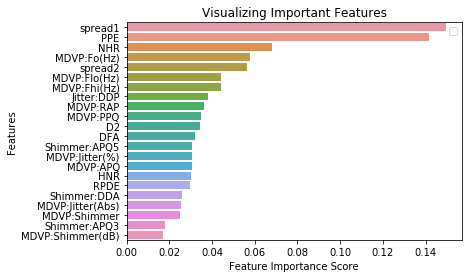

In [190]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [264]:
from sklearn.preprocessing import LabelEncoder

X = data[feature_cols].values
y = data['status'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) +1

label_dict = {1:'No Parkinsons' , 2:'Parkinsons'}

In [199]:
np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,3):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [ 1.8194e+02  2.2364e+02  1.4521e+02  3.8660e-03  2.3375e-05  1.9250e-03
  2.0560e-03  5.7760e-03  1.7615e-02  1.6296e-01  9.5035e-03  1.0509e-02
  1.3305e-02  2.8511e-02  1.1483e-02  2.4679e+01  4.4255e-01  6.9572e-01
 -6.7593e+00  1.6029e-01  2.1545e+00  1.2302e-01]

Mean Vector class 2: [ 1.4518e+02  1.8844e+02  1.0689e+02  6.9893e-03  5.0680e-05  3.7575e-03
  3.9003e-03  1.1273e-02  3.3658e-02  3.2120e-01  1.7676e-02  2.0285e-02
  2.7600e-02  5.3027e-02  2.9211e-02  2.0974e+01  5.1682e-01  7.2541e-01
 -5.3334e+00  2.4813e-01  2.4561e+00  2.3383e-01]



In [208]:
S_W = np.zeros((22,22))
for cl,mv in zip(range(1,3), mean_vectors):
    class_sc_mat = np.zeros((22,22))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(22,1), mv.reshape(22,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[ 2.8346e+05  2.4777e+05  1.5751e+05 -4.3973e-01 -7.0501e-02  6.2155e-01
  -3.1889e-02  1.8627e+00  6.4425e+00  9.5081e+01  3.1474e+00  6.1786e+00
   8.4305e+00  9.4378e+00  1.6445e+01 -2.8256e+03 -2.2163e+02 -1.5868e+02
  -1.7254e+03 -5.0230e+01  9.4816e+02 -1.2206e+02]
 [ 2.4777e+05  1.5791e+06  1.6829e+04  1.2762e+01  1.6728e-02  7.4526e+00
   6.8112e+00  2.2353e+01  2.1195e+01  3.5187e+02  9.7330e+00  1.0317e+01
   1.9691e+01  2.9203e+01  1.4006e+02 -6.6735e+03 -1.1280e+02 -2.9917e+02
   3.3249e+02  1.0750e+02  1.5821e+03  2.9883e+01]
 [ 1.5751e+05  1.6829e+04  3.1434e+05 -1.3975e+00 -4.3824e-02  2.1745e-02
   3.2461e-01  6.7000e-02 -7.7159e-01  2.3441e+01 -1.5930e+00  3.2904e+00
   4.4670e+00 -4.7772e+00 -1.2507e+01  2.7429e+03 -2.4821e+02  1.7614e+01
  -1.6578e+03 -4.9927e+01  9.2847e+01 -1.0513e+02]
 [-4.3973e-01  1.2762e+01 -1.3975e+00  4.2069e-03  2.7560e-05  2.5571e-03
   2.3197e-03  7.6713e-03  1.1827e-02  1.2953e-01  6.2063e-03  7.1004e-03
   

In [209]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((22,22))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(22,1) # make column vector
    overall_mean = overall_mean.reshape(22,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 4.8888e+04  4.6811e+04  5.0959e+04 -4.1540e+00 -3.6317e-02 -2.4373e+00
  -2.4530e+00 -7.3112e+00 -2.1338e+01 -2.1047e+02 -1.0869e+01 -1.3003e+01
  -1.9014e+01 -3.2607e+01 -2.3579e+01  4.9274e+03 -9.8774e+01 -3.9492e+01
  -1.8964e+03 -1.1683e+02 -4.0110e+02 -1.4738e+02]
 [ 4.6811e+04  4.4822e+04  4.8794e+04 -3.9775e+00 -3.4774e-02 -2.3337e+00
  -2.3488e+00 -7.0006e+00 -2.0431e+01 -2.0153e+02 -1.0408e+01 -1.2450e+01
  -1.8206e+01 -3.1222e+01 -2.2577e+01  4.7180e+03 -9.4577e+01 -3.7814e+01
  -1.8159e+03 -1.1187e+02 -3.8405e+02 -1.4112e+02]
 [ 5.0959e+04  4.8794e+04  5.3117e+04 -4.3299e+00 -3.7855e-02 -2.5405e+00
  -2.5569e+00 -7.6209e+00 -2.2241e+01 -2.1939e+02 -1.1330e+01 -1.3553e+01
  -1.9819e+01 -3.3988e+01 -2.4578e+01  5.1361e+03 -1.0296e+02 -4.1165e+01
  -1.9767e+03 -1.2178e+02 -4.1808e+02 -1.5362e+02]
 [-4.1540e+00 -3.9775e+00 -4.3299e+00  3.5296e-04  3.0858e-06  2.0709e-04
   2.0843e-04  6.2123e-04  1.8130e-03  1.7884e-02  9.2356e-04  1.1048e-03
  

In [210]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(22,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 6.7138e-07]
 [ 3.2445e-08]
 [ 4.3224e-07]
 [ 4.9813e-02]
 [ 9.3527e-01]
 [ 2.1377e-01]
 [ 1.0175e-02]
 [-1.0153e-01]
 [-7.7290e-03]
 [-1.6078e-04]
 [ 2.4531e-01]
 [ 7.4323e-03]
 [ 8.6576e-04]
 [-7.9895e-02]
 [ 7.1114e-04]
 [ 4.4186e-06]
 [ 2.8564e-04]
 [-9.9998e-05]
 [-3.5843e-05]
 [-3.5635e-04]
 [-1.3926e-05]
 [-3.5575e-04]]
Eigenvalue 1: 9.71e-01

Eigenvector 2: 
[[-6.7033e-07]
 [-3.2360e-08]
 [-4.3148e-07]
 [-4.9731e-02]
 [-9.3298e-01]
 [-2.1451e-01]
 [-1.0157e-02]
 [ 1.0162e-01]
 [ 7.7183e-03]
 [ 1.6050e-04]
 [-2.5409e-01]
 [-7.4204e-03]
 [-8.6478e-04]
 [ 7.7194e-02]
 [-7.0994e-04]
 [-4.4117e-06]
 [-2.8516e-04]
 [ 9.9816e-05]
 [ 3.5783e-05]
 [ 3.5570e-04]
 [ 1.3906e-05]
 [ 3.5512e-04]]
Eigenvalue 2: -9.09e-09

Eigenvector 3: 
[[ 7.0321e-07]
 [ 3.2704e-08]
 [ 4.5326e-07]
 [ 5.2284e-02]
 [ 9.4628e-01]
 [ 2.9873e-01]
 [ 1.0621e-02]
 [-1.0615e-01]
 [-8.0690e-03]
 [-1.6991e-04]
 [-3.0151e-02]
 [ 7.8357e-03]
 [ 8.8769e-04]
 [ 1.2333e-02]
 [ 7.4343e-04]
 [ 4.6916e-06]


In [211]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(22,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


In [212]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

0.9713893287589177
9.085257987085023e-09
6.925745255679197e-11
7.423707307941161e-12
7.015174954550903e-12
2.7330960697805207e-13
2.7330960697805207e-13
9.060807601996766e-14
5.500181152117597e-14
5.24532762635126e-14
5.24532762635126e-14
4.5913381470041086e-14
4.5913381470041086e-14
2.7999209119055195e-14
2.7999209119055195e-14
2.4664929915725303e-14
2.4664929915725303e-14
1.7282043362431848e-14
1.439258287511938e-14
6.9594306287683036e-15
9.577790450483317e-16
9.577790450483317e-16


In [213]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
eigenvalue 11: 0.00%
eigenvalue 12: 0.00%
eigenvalue 13: 0.00%
eigenvalue 14: 0.00%
eigenvalue 15: 0.00%
eigenvalue 16: 0.00%
eigenvalue 17: 0.00%
eigenvalue 18: 0.00%
eigenvalue 19: 0.00%
eigenvalue 20: 0.00%
eigenvalue 21: 0.00%
eigenvalue 22: 0.00%


In [214]:
W = np.hstack((eig_pairs[0][1].reshape(22,1), eig_pairs[1][1].reshape(22,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 6.7138e-07 -6.7033e-07]
 [ 3.2445e-08 -3.2360e-08]
 [ 4.3224e-07 -4.3148e-07]
 [ 4.9813e-02 -4.9731e-02]
 [ 9.3527e-01 -9.3298e-01]
 [ 2.1377e-01 -2.1451e-01]
 [ 1.0175e-02 -1.0157e-02]
 [-1.0153e-01  1.0162e-01]
 [-7.7290e-03  7.7183e-03]
 [-1.6078e-04  1.6050e-04]
 [ 2.4531e-01 -2.5409e-01]
 [ 7.4323e-03 -7.4204e-03]
 [ 8.6576e-04 -8.6478e-04]
 [-7.9895e-02  7.7194e-02]
 [ 7.1114e-04 -7.0994e-04]
 [ 4.4186e-06 -4.4117e-06]
 [ 2.8564e-04 -2.8516e-04]
 [-9.9998e-05  9.9816e-05]
 [-3.5843e-05  3.5783e-05]
 [-3.5635e-04  3.5570e-04]
 [-1.3926e-05  1.3906e-05]
 [-3.5575e-04  3.5512e-04]]


In [215]:
X_lda = X.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."

AssertionError: The matrix is not 150x2 dimensional.

In [230]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [269]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's'),('blue', 'red')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,0][y == label] *-1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

/Users/adrianamorales/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/adrianamorales/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/adrianamorales/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/adrianamorales/anaconda3/lib/python3.7/

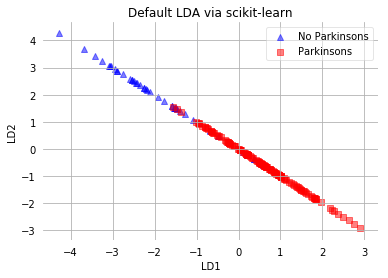

In [270]:
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')